In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YQ6JuUDp8ktn6krvungs")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-20 in yolov11:: 100%|██████████| 756/756 [00:00<00:00, 7191.56it/s]


In [ ]:
!nvidia-smi

Tue Aug  5 13:41:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.5/112.6 GB disk)


In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/football-players-detection-20/train/images/08fd33_0_10_png.rf.ffdf4d0f8ad347f03138c63286707b8b.jpg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/football-players-detection-20/train/images/08fd33_0_10_png.rf.ffdf4d0f8ad347f03138c63286707b8b.jpg: 640x640 23 persons, 8.4ms
Speed: 3.9ms preprocess, 8.4ms inference, 182.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


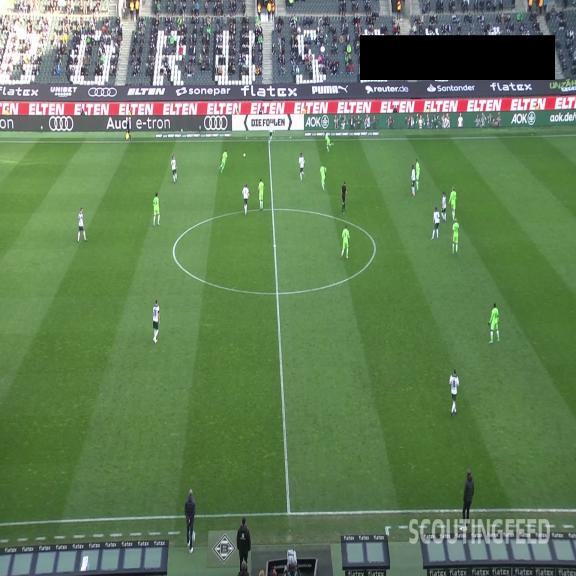

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/football-players-detection-20/test/images/08fd33_3_6_png.rf.261781c58b95436fb40e6afc0495bc57.jpg', width=600)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests
import io

model = YOLO('yolo11n.pt')
image_path = '/content/football-players-detection-20/train/images/08fd33_0_10_png.rf.ffdf4d0f8ad347f03138c63286707b8b.jpg'
image = Image.open(image_path)
result = model.predict(image, conf=0.25)[0]


0: 640x640 23 persons, 10.2ms
Speed: 4.2ms preprocess, 10.2ms inference, 140.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
result.boxes.xyxy

tensor([[141.2797, 260.2420, 154.2804, 298.0066],
        [214.0249, 210.8628, 223.5310, 244.1672],
        [123.3168, 245.4674, 133.4931, 279.5188],
        [313.9728, 241.9387, 327.1412, 271.9641],
        [200.6286, 259.0326, 209.9878, 297.9949],
        [323.8042, 281.3035, 332.9750, 317.8875],
        [468.1615, 444.4694, 478.6692, 497.9286],
        [172.5806, 350.9558, 182.7887, 390.6157],
        [ 87.4881, 305.7996,  96.9259, 348.3652],
        [ 59.2543, 301.1864,  70.5202, 340.0829],
        [241.3742, 444.1823, 252.2538, 484.6204],
        [384.9969, 243.1662, 394.3526, 279.6812],
        [370.4058, 335.3701, 382.6384, 379.7847],
        [250.0143, 399.7049, 261.2775, 445.0762],
        [182.6288, 222.5231, 191.5879, 254.5481],
        [280.8489, 534.5020, 295.0852, 559.5811],
        [497.2291, 283.0080, 512.0159, 326.1192],
        [131.6737, 214.3466, 140.0790, 245.5568],
        [439.6096, 236.3075, 450.7815, 270.8271],
        [206.6553, 109.6594, 215.1730, 133.3510],


In [ ]:
result.boxes.conf


tensor([0.6889, 0.6692, 0.6601, 0.6487, 0.6436, 0.5928, 0.5918, 0.5633, 0.5450, 0.5331, 0.5279, 0.5261, 0.4526, 0.3990, 0.3975, 0.3739, 0.3727, 0.3542, 0.3236, 0.2907, 0.2896, 0.2878, 0.2589], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

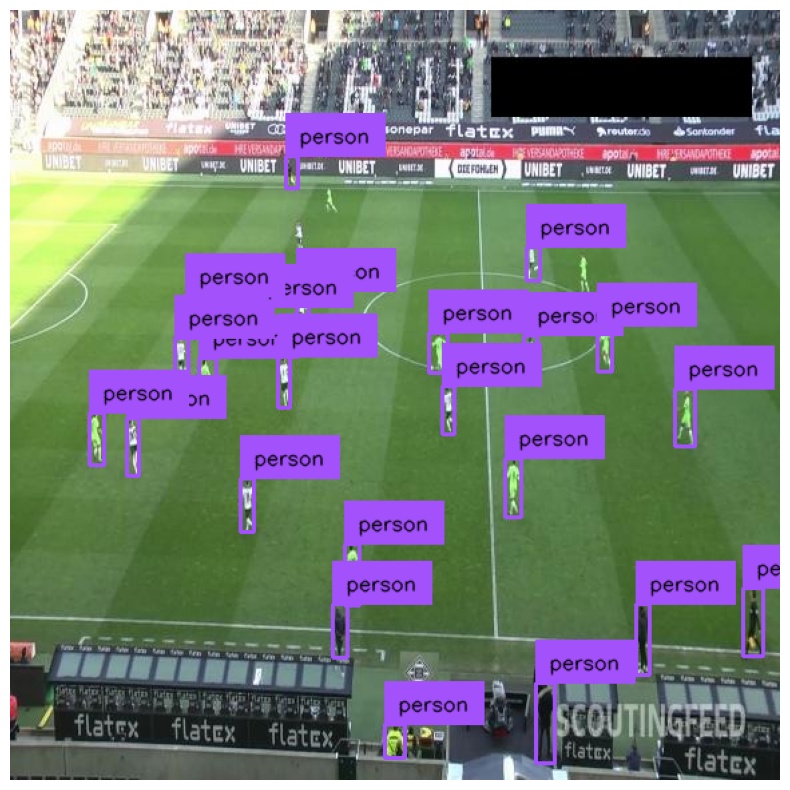

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YQ6JuUDp8ktn6krvungs")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YQ6JuUDp8ktn6krvungs")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to football-players-detection-20 in yolov11:: 100%|██████████| 756/756 [00:00<00:00, 7663.22it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 244MB/s]
New https://pypi.org/project/ultralytics/8.3.174 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/football-players-detection-20/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.csv
confusion_matrix_normalized.png			    results.png
confusion_matrix.png				    train_batch0.jpg
events.out.tfevents.1754402221.dc26cc2627a5.5642.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    weights


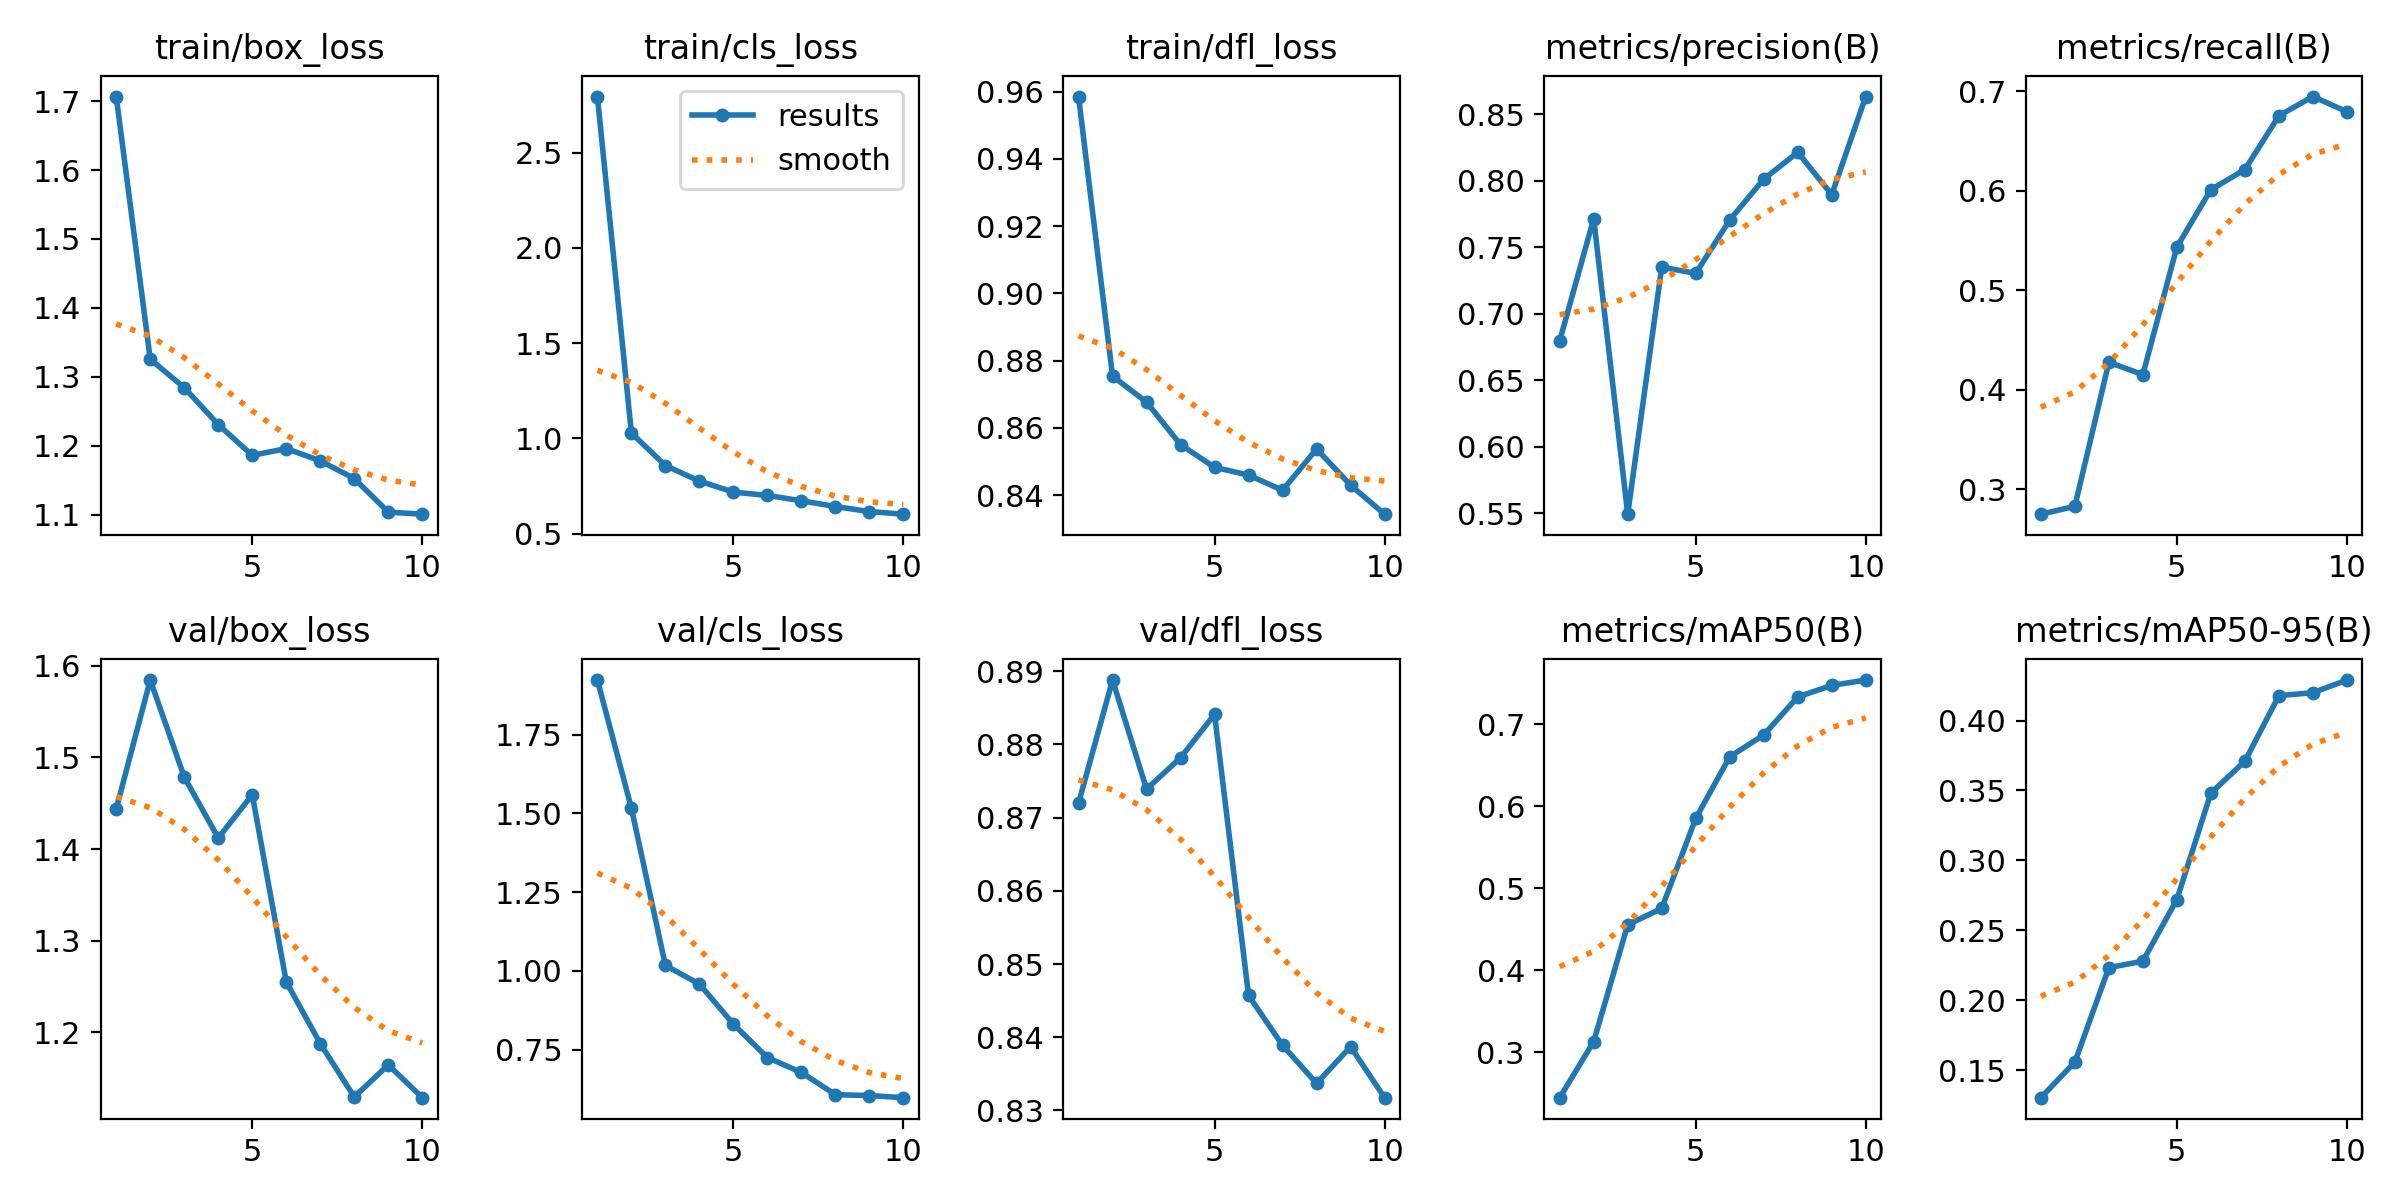

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/football-players-detection-20/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.11it/s]
                   all         49       1174      0.863       0.68      0.758      0.437
                  ball         45         45      0.855      0.262      0.345      0.121
            goalkeeper         38         39      0.845      0.846      0.903      0.505
                player         49        973        0.9      0.928      0.971      0.652
               referee         49        117      0.853      0.684      0.813      0.471
Speed: 0.5ms preprocess, 20.4ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/25 /content/datasets/football-players-detection-20/test/images/08fd33_3_6_png.rf.261781c58b95436fb40e6afc0495bc57.jpg: 640x640 22 players, 2 referees, 15.6ms
image 2/25 /content/datasets/football-players-detection-20/test/images/08fd33_9_3_png.rf.20ff5bcc914d7f607cf9425c73da679c.jpg: 640x640 21 players, 1 referee, 15.8ms
image 3/25 /content/datasets/football-players-detection-20/test/images/40cd38_7_6_png.rf.3e49856b19208cd7b616cd826a793f08.jpg: 640x640 1 goalkeeper, 21 players, 15.6ms
image 4/25 /content/datasets/football-players-detection-20/test/images/42ba34_1_5_png.rf.e530a34d1588130dae6f6cba815688ce.jpg: 640x640 1 ball, 1 goalkeeper, 22 players, 2 referees, 15.6ms
image 5/25 /content/datasets/football-players-detection-20/test/images/42ba34_5_5_png.rf.4153d27549bb9aad06d11a54c1ea3dc3.jpg: 640x640 1 goalkeepe

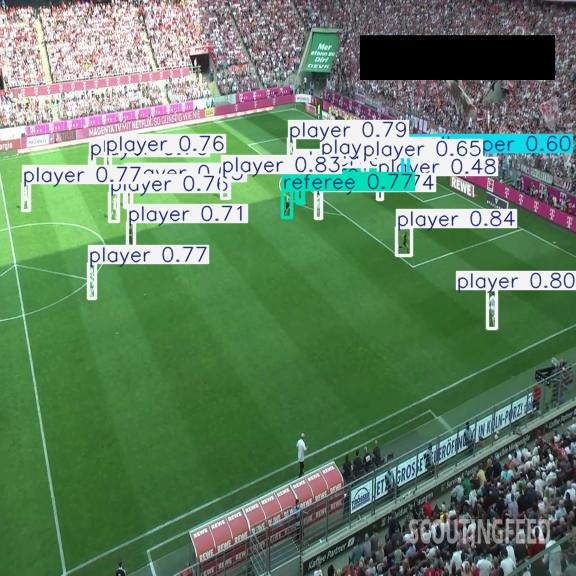

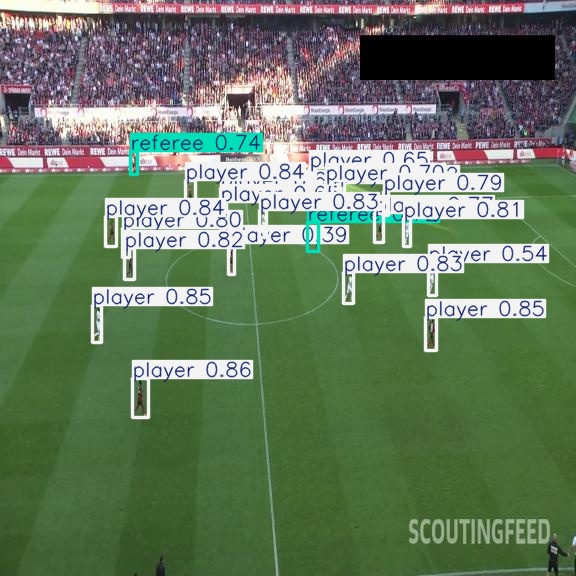

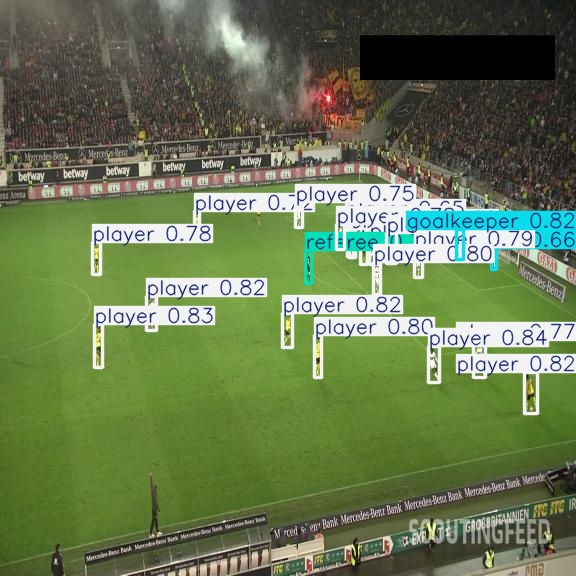

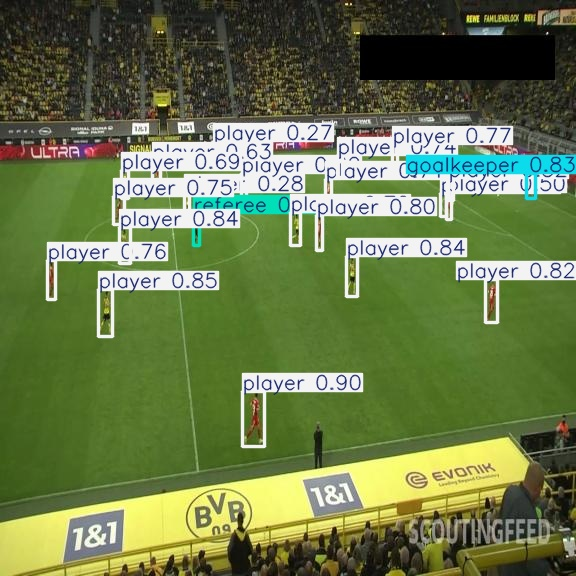

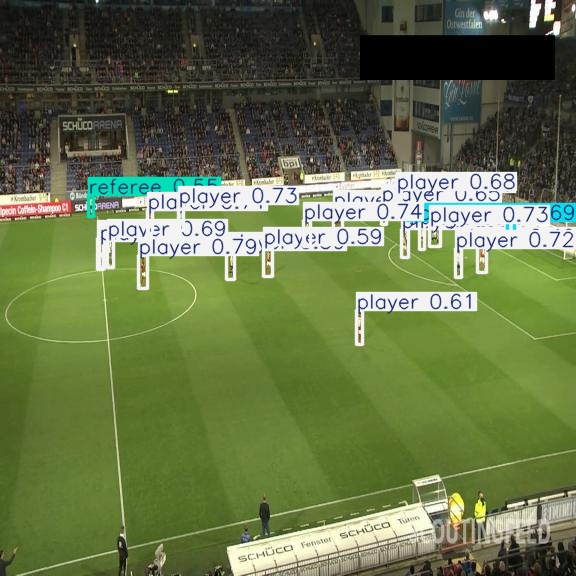

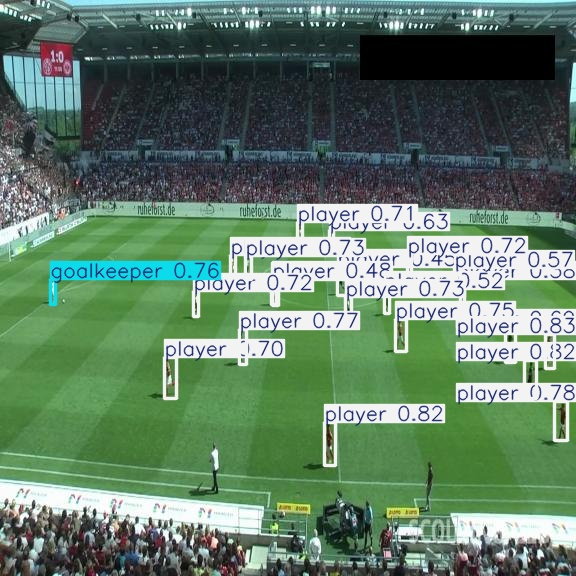

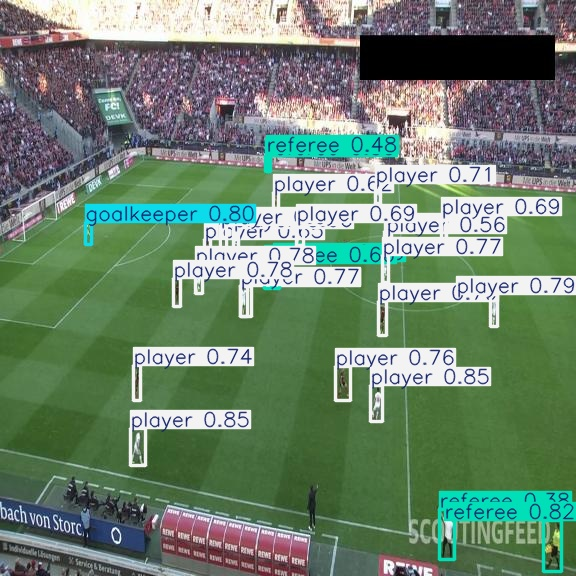

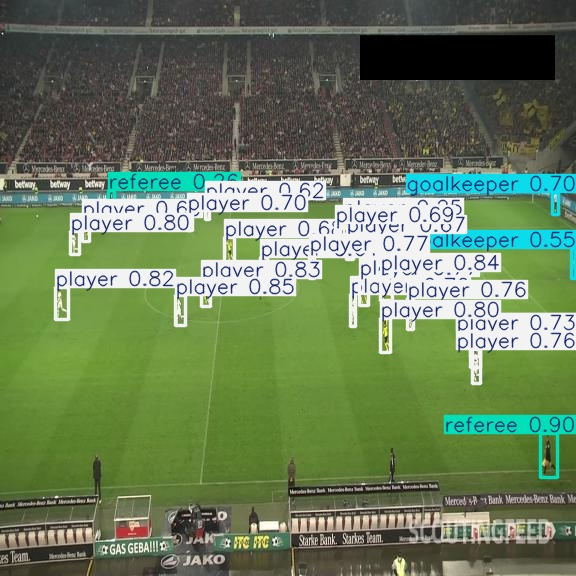

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")